In [1]:
import numpy as np
import pandas as pd
import os

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tema2-aa-grafice"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
columns = {"cat": [],
           "K": [],
           "|V|": [],
           "|E|": [],
           "speedup": []
          }
df = pd.DataFrame(columns)
df

,cat,K,|V|,|E|,speedup


In [3]:
cat1_KVE = [[7, 10, 40], [7, 10, 40], [7, 11, 43], [7, 13, 50]]
cat2_KVE = [[3, 20, 54], [4, 50, 50], [3, 115, 219], [2, 150, 200], [3, 145, 277], [3, 135, 248]]
cat3_KVE = [[4, 6, 10],[5, 6, 10], [6, 10, 20], [4, 6, 13], [5, 7, 13], [5, 7, 20], [4, 8, 15], [5, 8, 17], [6, 9, 24], [6, 10, 10]]

In [4]:
for list in cat1_KVE:
    df.loc[len(df.index)] = ["1"] + list + [15]
for list in cat2_KVE:
    df.loc[len(df.index)] = ["2"] + list + [50]
for list in cat3_KVE:
    df.loc[len(df.index)] = ["3"] + list + [10]
    
df.set_index("cat", inplace=True)
df

,K,|V|,|E|,speedup
cat,,,,
1,7.0,10.0,40.0,15.0
1,7.0,10.0,40.0,15.0
1,7.0,11.0,43.0,15.0
1,7.0,13.0,50.0,15.0
2,3.0,20.0,54.0,50.0
2,4.0,50.0,50.0,50.0
2,3.0,115.0,219.0,50.0
2,2.0,150.0,200.0,50.0
2,3.0,145.0,277.0,50.0


array([[<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'|V|'}>],
       [<AxesSubplot:title={'center':'|E|'}>,
        <AxesSubplot:title={'center':'speedup'}>]], dtype=object)

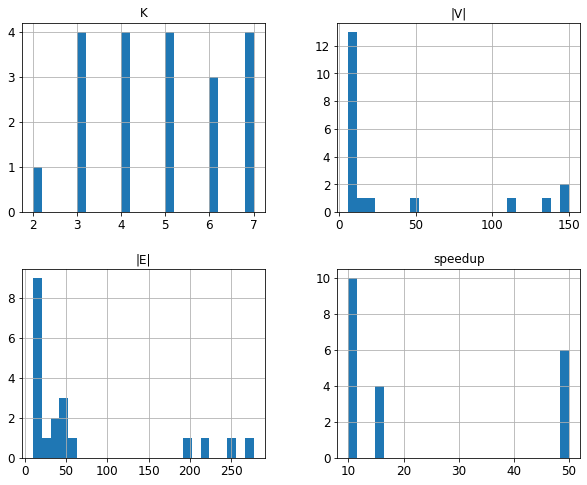

In [5]:
df.hist(bins=25, figsize=(10,8))

In [6]:
cat1_df = df.iloc[:4]
cat2_df = df.iloc[5:10]
cat3_df = df.iloc[11:]

Saving figure k_vs_speedup


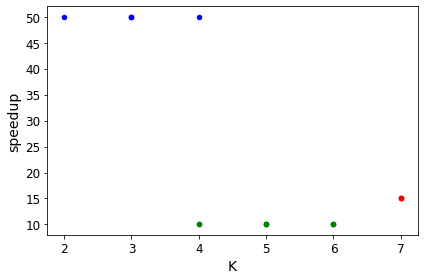

In [7]:
# K vs Speedup
ax = cat1_df.plot(kind="scatter", x="K", y="speedup", color="red")     # cat1 - red
cat2_df.plot(kind="scatter", x="K", y="speedup", color="blue", ax=ax)  # cat2 - blue
cat3_df.plot(kind="scatter", x="K", y="speedup", color="green", ax=ax) # cat3 - green
save_fig("k_vs_speedup")

Saving figure V_vs_speedup


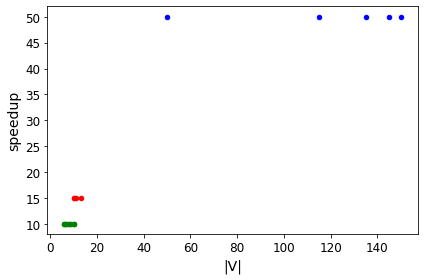

In [8]:
# |V| vs Speedup
ax = cat1_df.plot(kind="scatter", x="|V|", y="speedup", color="red")     # cat1 - red
cat2_df.plot(kind="scatter", x="|V|", y="speedup", color="blue", ax=ax)  # cat2 - blue
cat3_df.plot(kind="scatter", x="|V|", y="speedup", color="green", ax=ax) # cat3 - green
save_fig("V_vs_speedup")

Saving figure E_vs_speedup


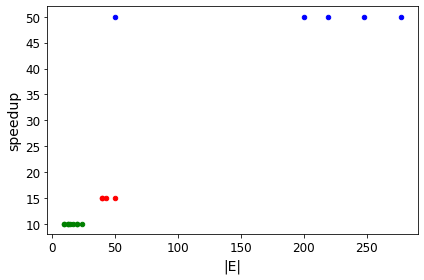

In [9]:
# |E| vs Speedup
ax = cat1_df.plot(kind="scatter", x="|E|", y="speedup", color="red")     # cat1 - red
cat2_df.plot(kind="scatter", x="|E|", y="speedup", color="blue", ax=ax)  # cat2 - blue
cat3_df.plot(kind="scatter", x="|E|", y="speedup", color="green", ax=ax) # cat3 - green
save_fig("E_vs_speedup")

In [10]:
# Let's normalize the data
from sklearn import preprocessing

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

In [11]:
df_normalized.rename(columns={0:"K", 1:"|V|", 2:"|E|", 3:"speedup"}, inplace=True)

In [12]:
df_normalized

,K,|V|,|E|,speedup
0,1.0,0.027778,0.112360,0.125
1,1.0,0.027778,0.112360,0.125
2,1.0,0.034722,0.123596,0.125
3,1.0,0.048611,0.149813,0.125
4,0.2,0.097222,0.164794,1.000
5,0.4,0.305556,0.149813,1.000
6,0.2,0.756944,0.782772,1.000
7,0.0,1.000000,0.711610,1.000
8,0.2,0.965278,1.000000,1.000
9,0.2,0.895833,0.891386,1.000


In [13]:
cat1_df_norm = df_normalized.iloc[:4]
cat2_df_norm = df_normalized.iloc[5:10]
cat3_df_norm = df_normalized.iloc[11:]

Saving figure k_normalized_vs_speedup


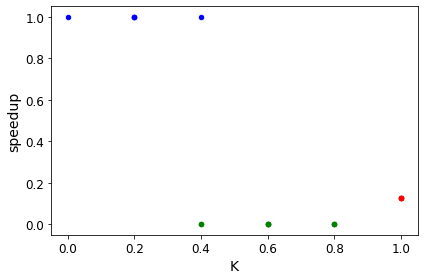

In [14]:
# K_normalized vs Speedup
ax_K = cat1_df_norm.plot(kind="scatter", x="K", y="speedup", color="red")     # cat1 - red
cat2_df_norm.plot(kind="scatter", x="K", y="speedup", color="blue", ax=ax_K)  # cat2 - blue
cat3_df_norm.plot(kind="scatter", x="K", y="speedup", color="green", ax=ax_K) # cat3 - green
save_fig("k_normalized_vs_speedup")

Saving figure V_normalized_vs_speedup


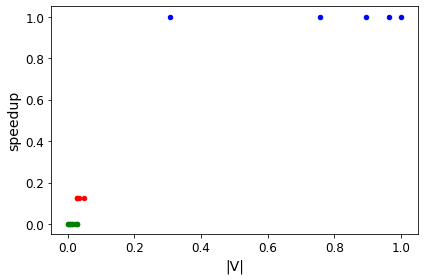

In [15]:
# |V|_normalized vs Speedup
ax_V = cat1_df_norm.plot(kind="scatter", x="|V|", y="speedup", color="red")     # cat1 - red
cat2_df_norm.plot(kind="scatter", x="|V|", y="speedup", color="blue", ax=ax_V)  # cat2 - blue
cat3_df_norm.plot(kind="scatter", x="|V|", y="speedup", color="green", ax=ax_V) # cat3 - green
save_fig("V_normalized_vs_speedup")

Saving figure E_normalized_vs_speedup


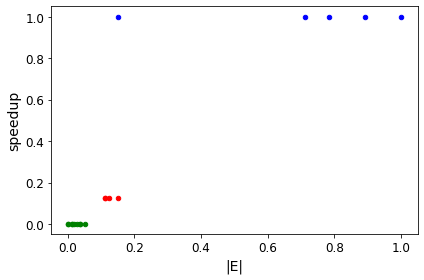

In [16]:
# |E|_normalized vs Speedup
ax_E = cat1_df_norm.plot(kind="scatter", x="|E|", y="speedup", color="red")     # cat1 - red
cat2_df_norm.plot(kind="scatter", x="|E|", y="speedup", color="blue", ax=ax_E)  # cat2 - blue
cat3_df_norm.plot(kind="scatter", x="|E|", y="speedup", color="green", ax=ax_E) # cat3 - green
save_fig("E_normalized_vs_speedup")

Saving figure V_per_k_vs_speedup


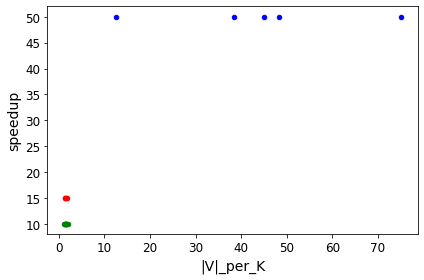

In [17]:
# Let's combine some attributes
df["|V|_per_K"] = df["|V|"]/df["K"]

ax = df.iloc[:4].plot(kind="scatter", x="|V|_per_K", y="speedup", color="red")       # cat1 - red
df.iloc[5:10].plot(kind="scatter", x="|V|_per_K", y="speedup", color="blue", ax=ax)  # cat2 - blue
df.iloc[11:].plot(kind="scatter", x="|V|_per_K", y="speedup", color="green", ax=ax)  # cat3 - green
save_fig("V_per_k_vs_speedup")

array([[<AxesSubplot:xlabel='K', ylabel='K'>,
        <AxesSubplot:xlabel='|V|', ylabel='K'>,
        <AxesSubplot:xlabel='|E|', ylabel='K'>,
        <AxesSubplot:xlabel='speedup', ylabel='K'>],
       [<AxesSubplot:xlabel='K', ylabel='|V|'>,
        <AxesSubplot:xlabel='|V|', ylabel='|V|'>,
        <AxesSubplot:xlabel='|E|', ylabel='|V|'>,
        <AxesSubplot:xlabel='speedup', ylabel='|V|'>],
       [<AxesSubplot:xlabel='K', ylabel='|E|'>,
        <AxesSubplot:xlabel='|V|', ylabel='|E|'>,
        <AxesSubplot:xlabel='|E|', ylabel='|E|'>,
        <AxesSubplot:xlabel='speedup', ylabel='|E|'>],
       [<AxesSubplot:xlabel='K', ylabel='speedup'>,
        <AxesSubplot:xlabel='|V|', ylabel='speedup'>,
        <AxesSubplot:xlabel='|E|', ylabel='speedup'>,
        <AxesSubplot:xlabel='speedup', ylabel='speedup'>]], dtype=object)

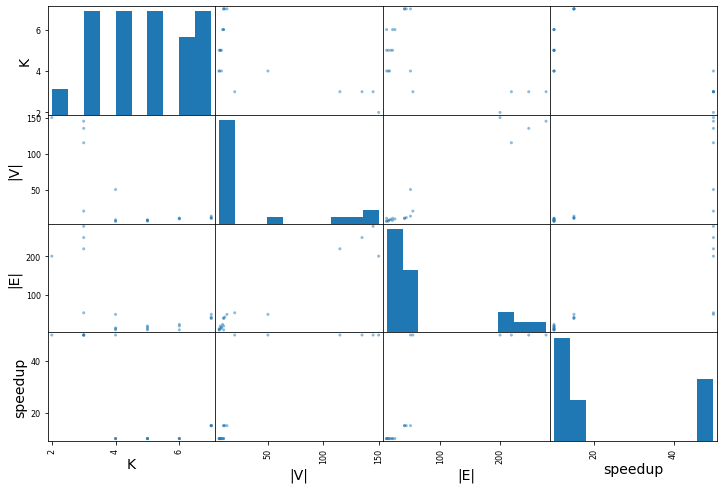

In [18]:
# Let's visualize some correlations between the attributes
# Isn't very usefull, because de dataset is very small
from pandas.plotting import scatter_matrix

attr = ["K", "|V|", "|E|", "speedup"]
scatter_matrix(df[attr], figsize=(12,8))